In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [2]:
A = imread("peppers-large.tiff")

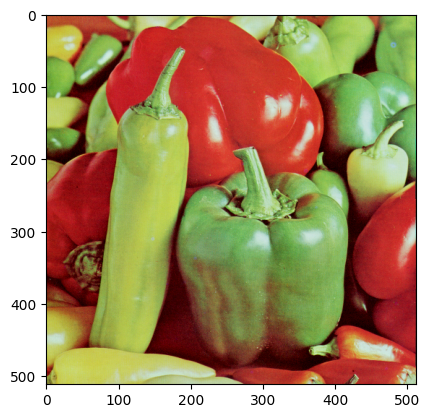

In [3]:
plt.imshow(A)
plt.show()

In [4]:
B = imread("peppers-small.tiff")

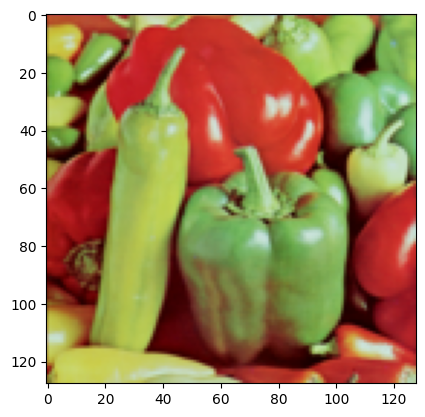

In [5]:
plt.imshow(B)
plt.show()

In [6]:
B.shape

(128, 128, 3)

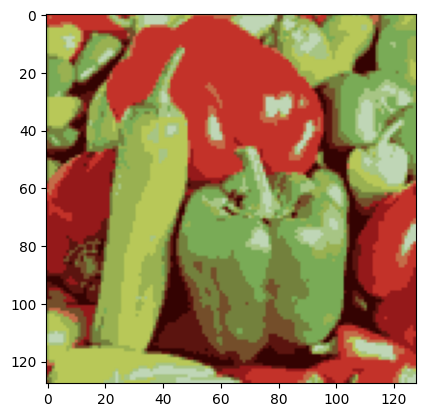

In [7]:
K = 16
centroids = []
row, col, _ = B.shape
cluster = np.random.randint(0, K-1, size=(row, col))
for _ in range(K):
    centroids.append(np.random.randint(0, high=255, size=3))
centroids = np.array(centroids)

it = 0
max_it = 200

while ((it < 30 or change) and it < max_it):
    change = False
    for i in range(row):
        for j in range(col):
            pixel = B[i,j]
            distance = np.linalg.norm(centroids - pixel, axis=1, keepdims=True)
            if (np.argmin(distance) != cluster[i][j]): 
                change = True
            cluster[i,j] = np.argmin(distance)

    for k in range(K):
        s = np.zeros(3)
        for i in range(row):
            for j in range(col):
                s += (cluster[i][j] == k) * B[i,j]
        if np.sum(cluster == k) > 0:
            centroids[k] = s / np.sum(cluster == k)
    
    it += 1

C = np.zeros((row, col, 3))
for i in range(row):
    for j in range(col):
        C[i, j] = centroids[cluster[i, j]]
C = C.astype(int)
plt.imshow(C)
plt.show()